<h1><b>IRIS FLOWER CLASSIFICATION PROJECT</b></h1>

The main objective of this project is to build and evaluate classification model to predict the species of IRIS flowers(Iris setosa,Iris versicolor,Iris virginic) based on their sepal length, sepal width, petal length, and petal width.

<h3>Dataset Information:</h3>


<ul><li>The dataset contains 3 classes of 50 instances each, where each class refers to a type of Iris plant.</li>
    <li>The dataset has no missing values</li></ul>

<h3>Attribute Information:</h3>

<ul><li>Sepal length in cm</li>
    <li>Sepal width in cm</li>
    <li>Petal length in cm</li>
    <li>Petal width in cm</li>
</ul>

<h3>Class:</h3>

<ul><li>Iris Setosa</li>
    <li>Iris Versicolor</li>
    <li>Iris Virginica</li></ul>


<h3><a href="http://archive.ics.uci.edu/dataset/53/iris">Iris flower dataset link</a></h3>


<h2>Data requirements</h2>

In [2]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#read dataset from internal storage and converting into dataframe
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h2>Data Prepration</h2>

<ul><li><h3>EDA (Exploratory Data Analysis)</h3></li></ul>

In [4]:
#checking all the features of dataset
df.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#checking the output variable
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#shape of dataset 
df.shape

(150, 6)

In [7]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#description of  data in a dataframe
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: ylabel='Species'>

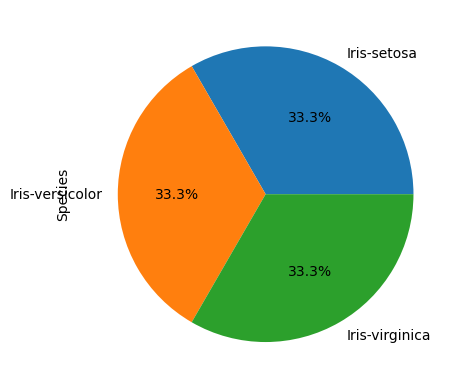

In [9]:
df['Species'].value_counts().plot(kind='pie',autopct='%0.1f%%')

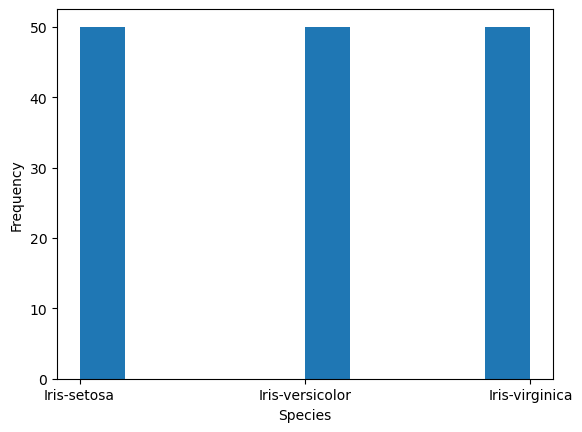

In [10]:
plt.hist(df.Species)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()

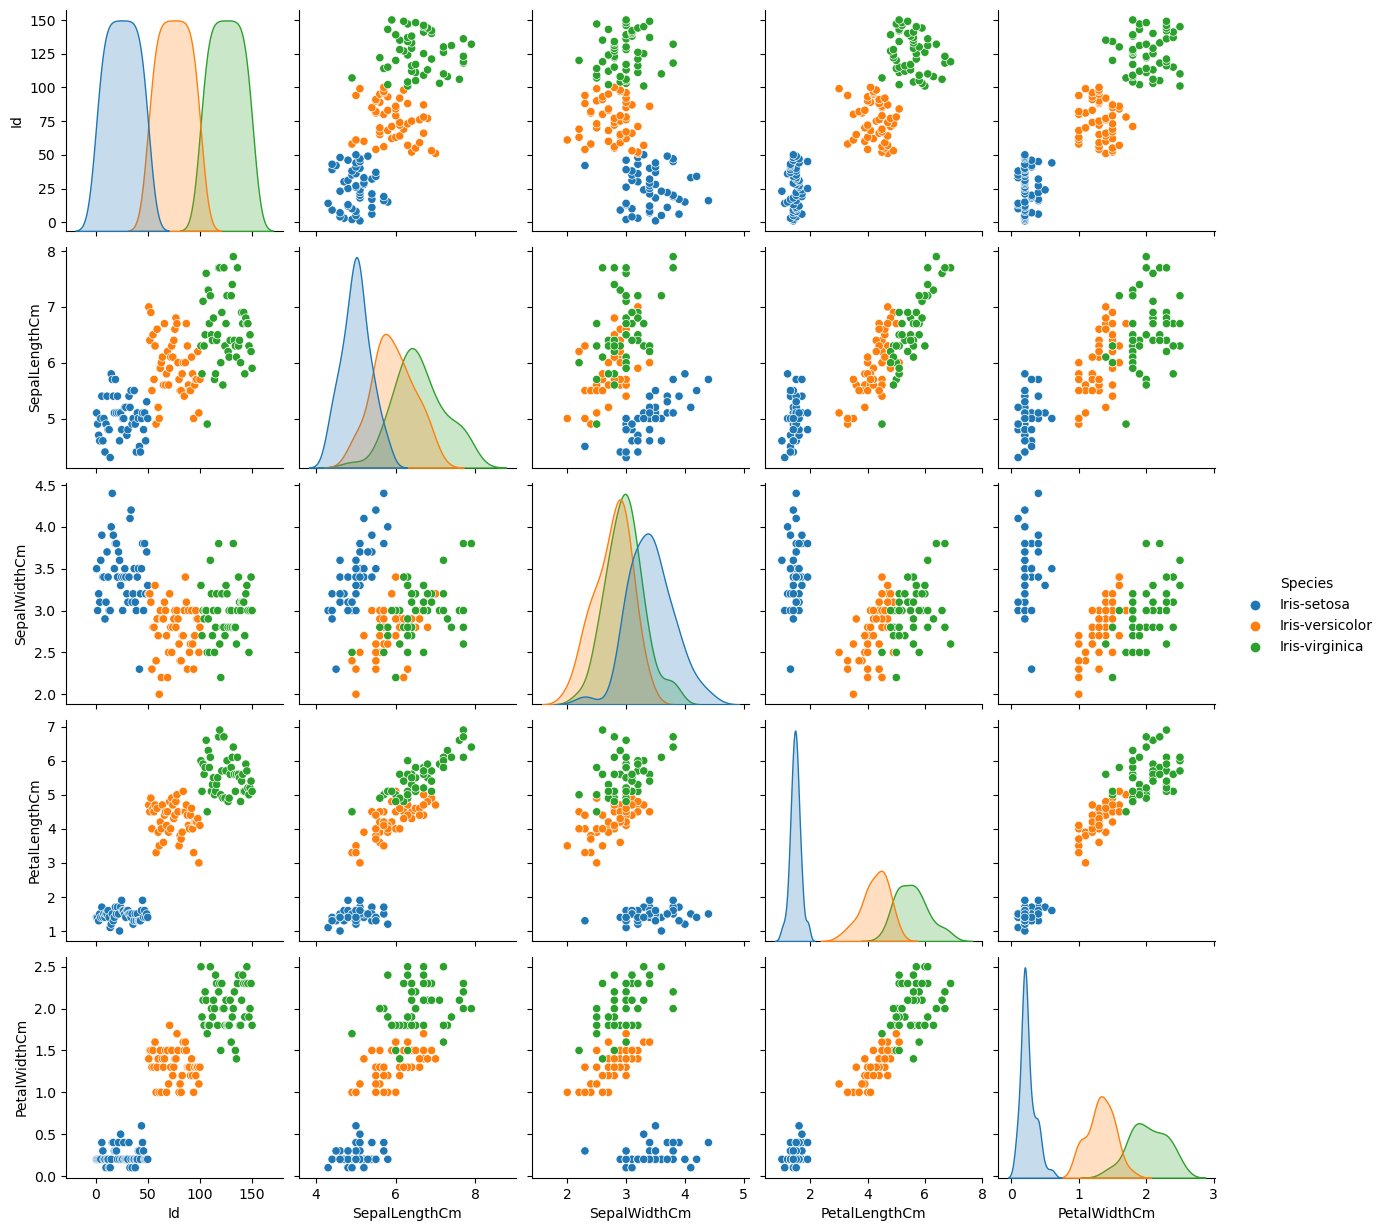

In [11]:
sns.pairplot(df, hue='Species')

<h4>result of eda</h4>


<ul><li>Data have only one categorial feature('Species')</li>
    <li>There is no use of ID column so drop it</li>
    <li>There is no missing value</li>
    <li>The three species shows in pairplot are easily identify because of cluster are not overlapped so much </li></ul>

<ul><li><h3>Feature Engineering and Selection</h3></li></ul>

In [12]:
#drop id 
df.drop(['Id'], axis=1,inplace=True)

In [13]:
#checking missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
#checking duplicate records
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [15]:
#delete the duplicate value 
df.drop_duplicates()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
df.shape

(150, 5)

In [17]:
df.reset_index(drop=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [19]:
#Change the output categorial  feature into numerical 
encoder = LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])

In [20]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot: >

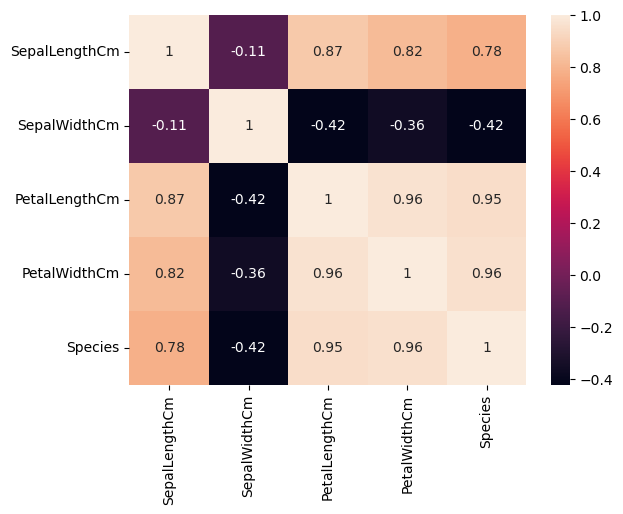

In [21]:
#cheaking the correlation 
sns.heatmap(df.corr(),annot=True)

In [22]:
# convert it into a independent and dependent features
X=df.drop(labels=['Species'],axis=1)
Y=df[['Species']]

In [23]:
df.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [24]:
#Calculating average of each features for all classes
data = df.values
x1 = data[:,0:4]
y1 = data[:,4]
columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']
Y_Data = np.array([np.average(x1[:, i][y1==j].astype('float32')) for i in range (x1.shape[1])
 for j in (np.unique(y1))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

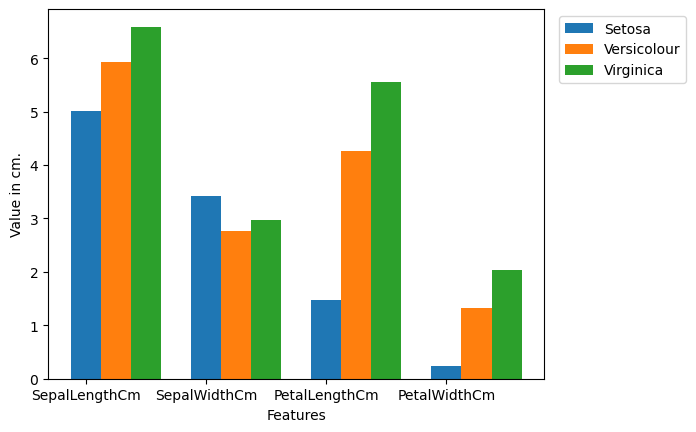

In [25]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

<h4>Result of Feature Engineering and Selection</h4>

<ul><li>All the independent feature is highly and medium correlated with dependent feature</li>
    <li>Duplicate value is removed and convert dependent feature into numeric values</li></ul>

<h2>Model Training</h2>

In [26]:
# split data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [27]:
#using  Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Make predictions on the test sets
y_pred = model.predict(X_test)

In [29]:
#print all the parameters 
print('Model Training Performance')
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred)*100)
print("confusion_matrix",confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Model Training Performance
RMSE: 0.0
MAE: 0.0
R2 score 100.0
confusion_matrix [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy_score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



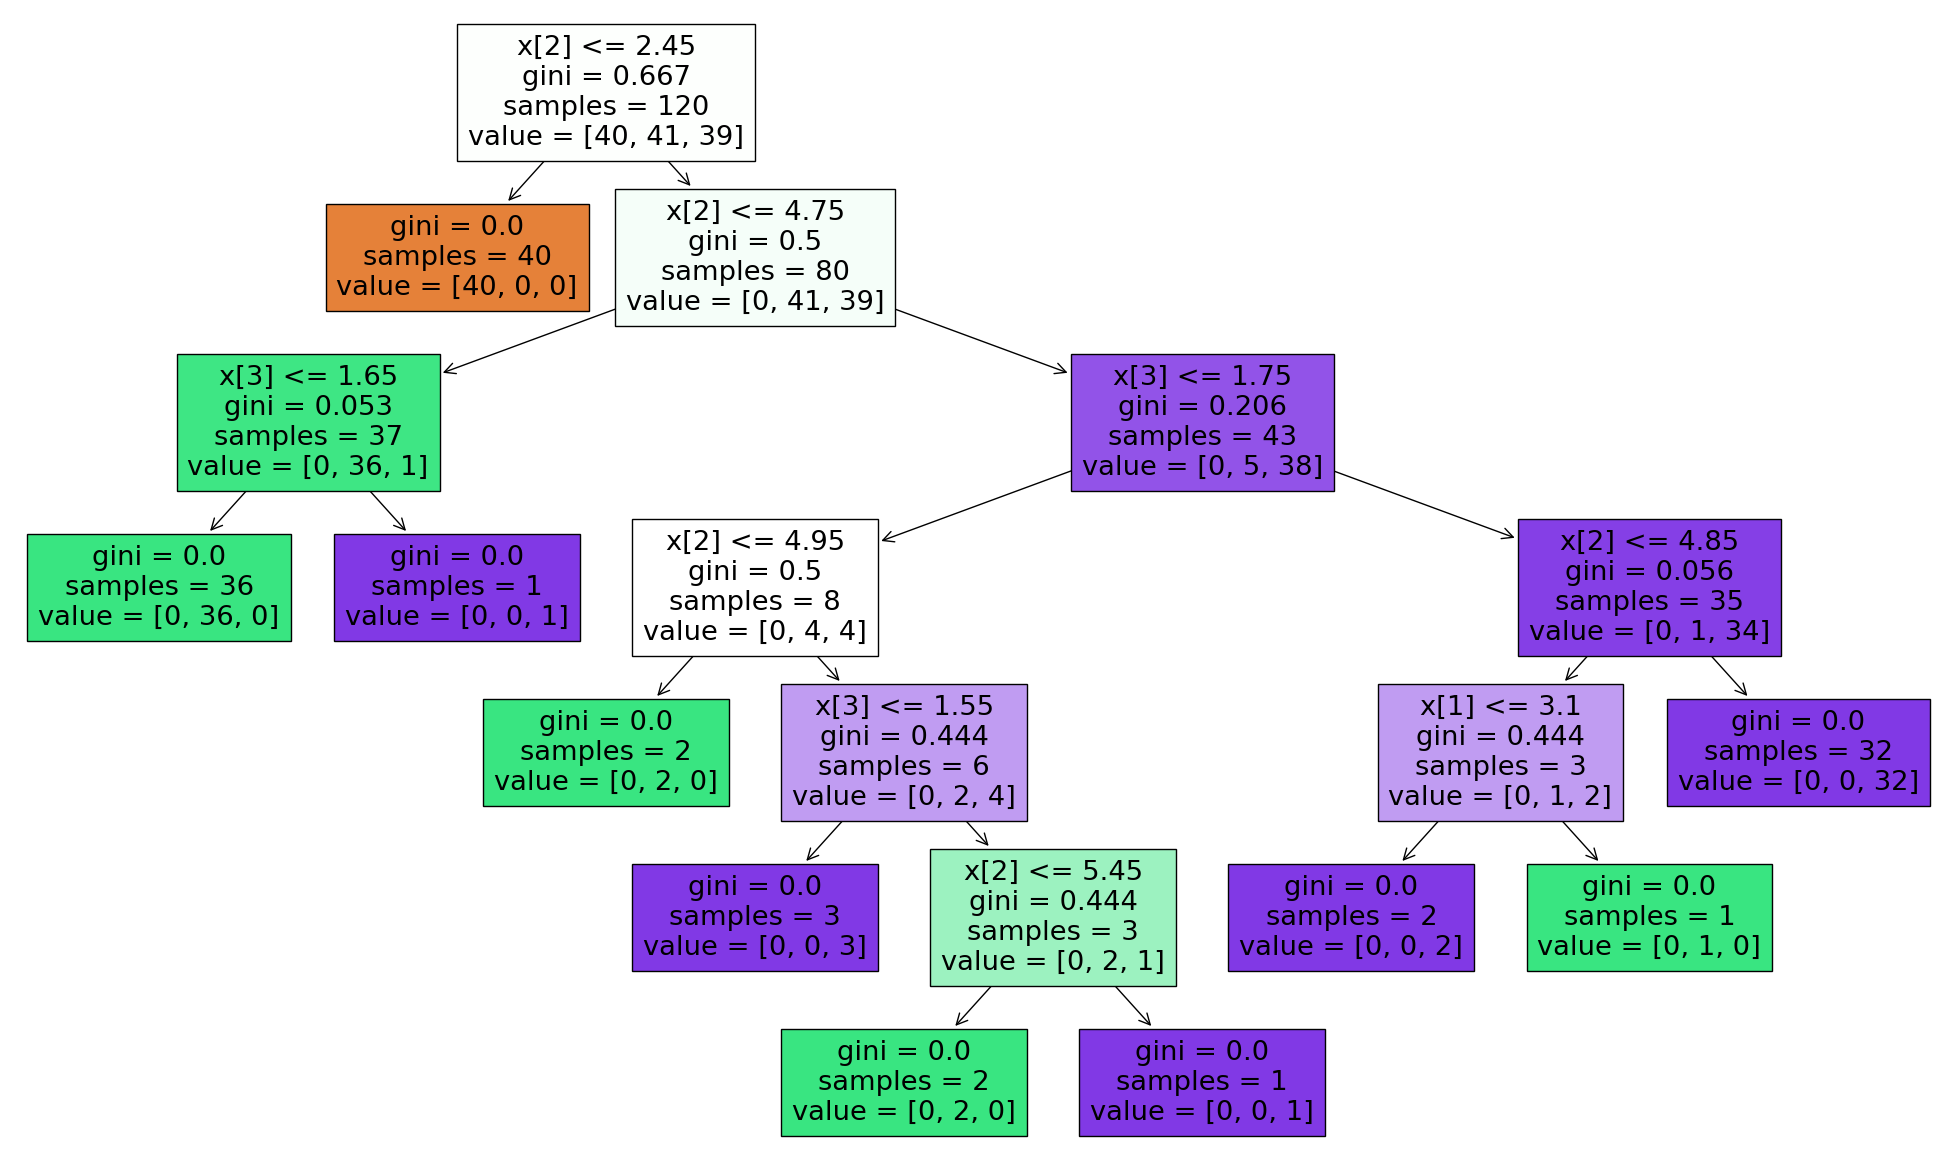

In [31]:
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)
plt.show()

<h4>Result of Model Training</h4>

<ul><li>Their is  approx 0.0 error during testing of model</li>
    <li>Model accuracy and r2_score is 1.0 and 100.0 approx</li></ul>
    

<h2>Model Prediction</h2>

In [32]:
# Creating a array 'new_data 'and predict it.
new_data = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction = model.predict(new_data)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


In [33]:
# prediction into original name.
new_data = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction = model.predict(new_data)
predicted_label = encoder.inverse_transform(prediction)
print("Prediction of Species: {}".format(predicted_label))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<h4>result of Model Prediction</h4>

<ul><li>Model predict the correct prediction</li>
    <li>Reverse the label encoding to get orginal species name</li></ul>

<h2>Conclusion</h2>

<b>Iris flower classification project with Decision tree algorithm and this model gives approx 100.0% r2_score and there is approx 0.0 % error during testing. The prediction for the new sample is approx 100% accurate by this we conclude that the model is able to capture the underlying patterns in the data (low bias) and is not too sensitive to changes in the training data (low variance).Hence the model accuracy is very high and we use this model for prediction.</b>